In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

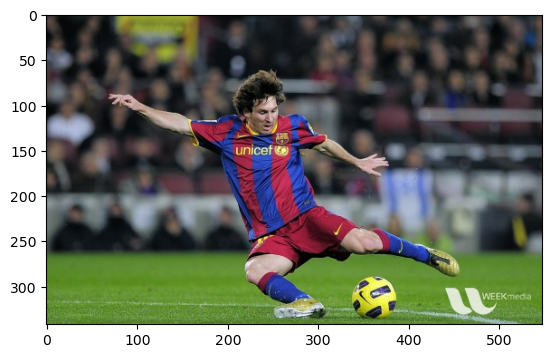

In [8]:
img = cv.imread('./hw/messi5.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

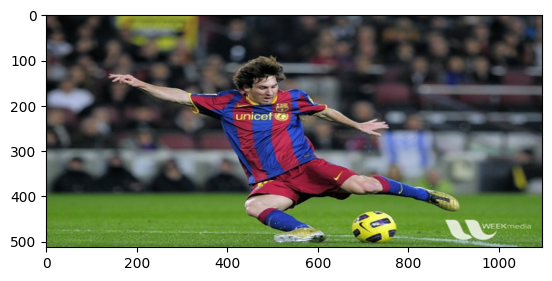

In [4]:
# Пример 1: используем коэффициенты масштабирования.
img_res = cv.resize(img, dsize=None, fx=2, fy=1.5, interpolation=cv.INTER_CUBIC)
plt.imshow(img_res)

In [5]:
print(img.shape)
print(img_res.shape)

(342, 548, 3)
(513, 1096, 3)


(50, 75, 3)


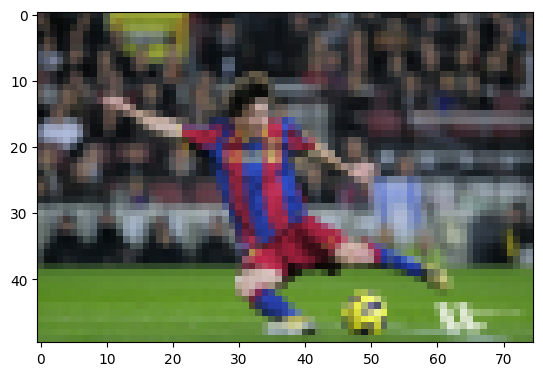

In [13]:
# Пример 1.2: то же самое мы можем сделать, используя размеры исходного изображения.
# height, width = img.shape[:2]
# img_res = cv.resize(img, dsize=(2 * width, int(1.5 * height)), interpolation=cv.INTER_CUBIC)

# Пример 1.3: указываем произвольный размер изображения.
img_res = cv.resize(img, dsize=(75, 50), interpolation=cv.INTER_AREA)

# Пример 1.4: используем другой способ для интерполяции пикселей.
# img_res = cv.resize(img, dsize=(400, 200), interpolation=cv.INTER_AREA)

plt.imshow(img_res)
print(img_res.shape)

In [20]:
tx = 100
ty = 50
M = np.float32([
    [1, 0, tx],
    [0, 1, ty],
]
)

(342, 548, 3)


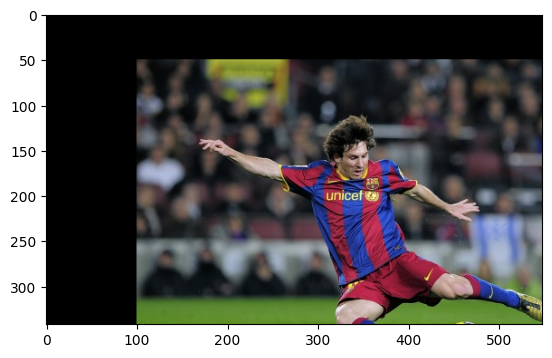

In [21]:
height, width = img.shape[:2]
# Внимание: мы указываем width, height в другом порядке!
img_res = cv.warpAffine(img, M, (width, height))

plt.imshow(img_res)
print(img_res.shape)

In [22]:
sx = 2
sy = 1.5
M = np.float32([
    [sx, 0, 0],
    [0, sy, 0],
]
)

(513, 1096, 3)


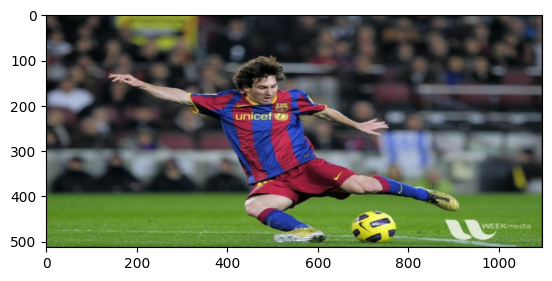

In [25]:
height, width = img.shape[:2]
# Внимание: мы указываем width, height в другом порядке!
img_res = cv.warpAffine(img, M, (int(width * sx), int(height * sy)))

plt.imshow(img_res)
print(img_res.shape)

(342, 548, 3)


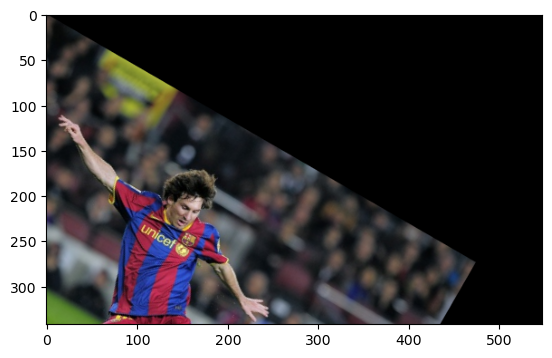

In [9]:
from math import sin, cos, pi

angle = 30 * pi / 180
M = np.float32([
    [cos(angle), -sin(angle), 0],
    [sin(angle), cos(angle), 0]]
)

height, width = img.shape[:2]

#поворот
img_res = cv.warpAffine(img, M, (width, height))


plt.imshow(img_res)
print(img_res.shape)

In [27]:
# Как объединять матрицы преобразования в композицию?
# M3 * M2 * M1 * v
# M = M3 * M2 * M1
# M * v